In [270]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from datetime import datetime

In [271]:
covid_df=pd.read_csv('covid_19_india.csv')
covid_df.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0


In [272]:
covid_df.info() #To inderstand the overall data structure and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [273]:
covid_df.describe() # to understand the basic statistics

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


In [274]:
vaccine_df= pd.read_csv('covid_vaccine_statewise.csv')
vaccine_df.head(3)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0


In [275]:
#Since we do not need some columns in the 'covid_df' dataframe for our analysis we are dropping them. 

covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"], inplace=True, axis=1)

In [276]:
covid_df.head(5)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [277]:
#changing the format of the date using the to_date function.

covid_df['Date'] = pd.to_datetime(covid_df['Date'])
covid_df['Date'] = covid_df['Date'].dt.strftime('%d-%m-%Y')
covid_df.head(3)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30-01-2020,Kerala,0.0,0.0,1.0
1,31-01-2020,Kerala,0.0,0.0,1.0
2,01-02-2020,Kerala,0.0,0.0,2.0


In [278]:
# Active cases - no of confirmed cases minus (the no of cured cases+ no of deaths).

covid_df['Active cases']=covid_df['Confirmed']-(covid_df['Cured']+covid_df['Deaths'])

In [279]:
covid_df.sample(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active cases
559,02-04-2020,Andaman and Nicobar Islands,0.0,0.0,10.0,10.0
3774,05-07-2020,Rajasthan,15640.0,447.0,19532.0,3445.0
12939,21-03-2021,Jammu and Kashmir,125218.0,1980.0,128389.0,1191.0
6465,20-09-2020,Goa,21760.0,342.0,28022.0,5920.0
8626,21-11-2020,Andaman and Nicobar Islands,4408.0,61.0,4617.0,148.0
14860,13-05-2021,Puducherry,60424.0,1045.0,77031.0,15562.0
4042,13-07-2020,Dadra and Nagar Haveli and Daman and Diu,245.0,0.0,479.0,234.0
250,21-03-2020,Delhi,5.0,1.0,26.0,20.0
2998,14-06-2020,Dadra and Nagar Haveli and Daman and Diu,2.0,0.0,35.0,33.0
14761,10-05-2021,West Bengal,854805.0,12327.0,993159.0,126027.0


In [280]:
# adding two columns in the dataframe representing the mortality rate percentage and recovery rate
covid_df['Recovery-rate(%)']=(covid_df['Cured']/covid_df['Confirmed'])*100
covid_df['Mortality-rate(%)']=(covid_df['Deaths']/covid_df['Confirmed'])*100
covid_df.sample(3)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active cases,Recovery-rate(%),Mortality-rate(%)
1262,24-04-2020,Goa,7.0,0.0,7.0,0.0,100.000000,0.000000
224,19-03-2020,Ladakh,0.0,0.0,8.0,8.0,0.000000,0.000000
9325,10-12-2020,West Bengal,478434.0,8867.0,510951.0,23650.0,93.635985,1.735391


In [281]:
# creating a pivot table 
statewise = pd.pivot_table(covid_df, values=["Confirmed","Deaths","Cured"], index="State/UnionTerritory", aggfunc=max)
statewise=statewise.sort_values(by="Confirmed", ascending=False)
statewise.head(10).style.background_gradient(cmap="hot")   #binary gist_yarg pink hot gist_heat copper cubehelix


,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Maharashtra,5433506.000000,4927480.000000,83777.000000
Karnataka,2272374.000000,1674487.000000,22838.000000
Kerala,2200706.000000,1846105.000000,6612.000000
Tamil Nadu,1664350.000000,1403052.000000,18369.000000
Uttar Pradesh,1637663.000000,1483249.000000,18072.000000
Andhra Pradesh,1475372.000000,1254291.000000,9580.000000
Delhi,1402873.000000,1329899.000000,22111.000000
West Bengal,1171861.000000,1026492.000000,13576.000000
Chhattisgarh,925531.000000,823113.000000,12036.000000


In [282]:
# Top 10 active cases states
top_10_active_states=covid_df.groupby(by='State/UnionTerritory').max()[['Active cases','Date']].sort_values(by=['Active cases'], ascending= False).reset_index()

Text(0, 0.5, 'Active cases')

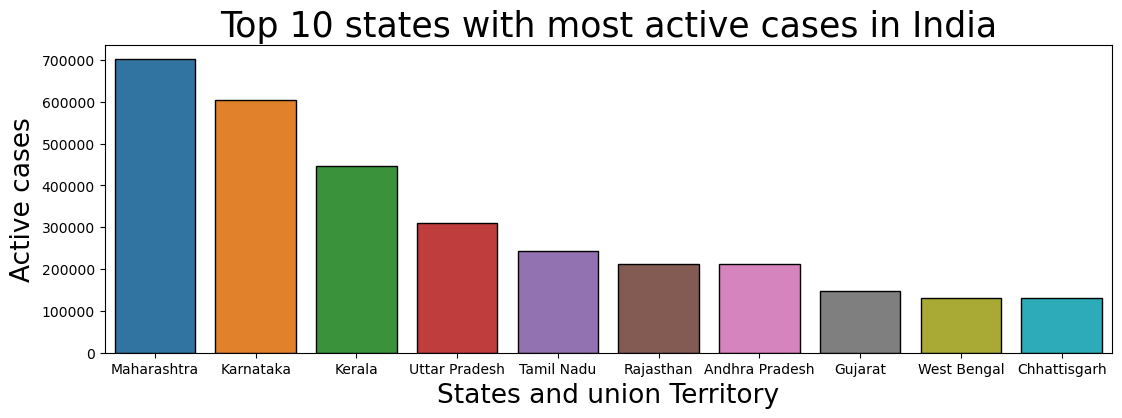

In [295]:
fig =plt.figure(figsize=(13,4))
plt.title('Top 10 states with most active cases in India', size=25)
sns.barplot(data=top_10_active_states.iloc[:10], y="Active cases", 
                 x="State/UnionTerritory", linewidth = 1, edgecolor='black')
plt.xlabel('States and union Territory', size=19)
plt.ylabel('Active cases', size=19)




Text(0, 0.5, 'Total Death Cases')

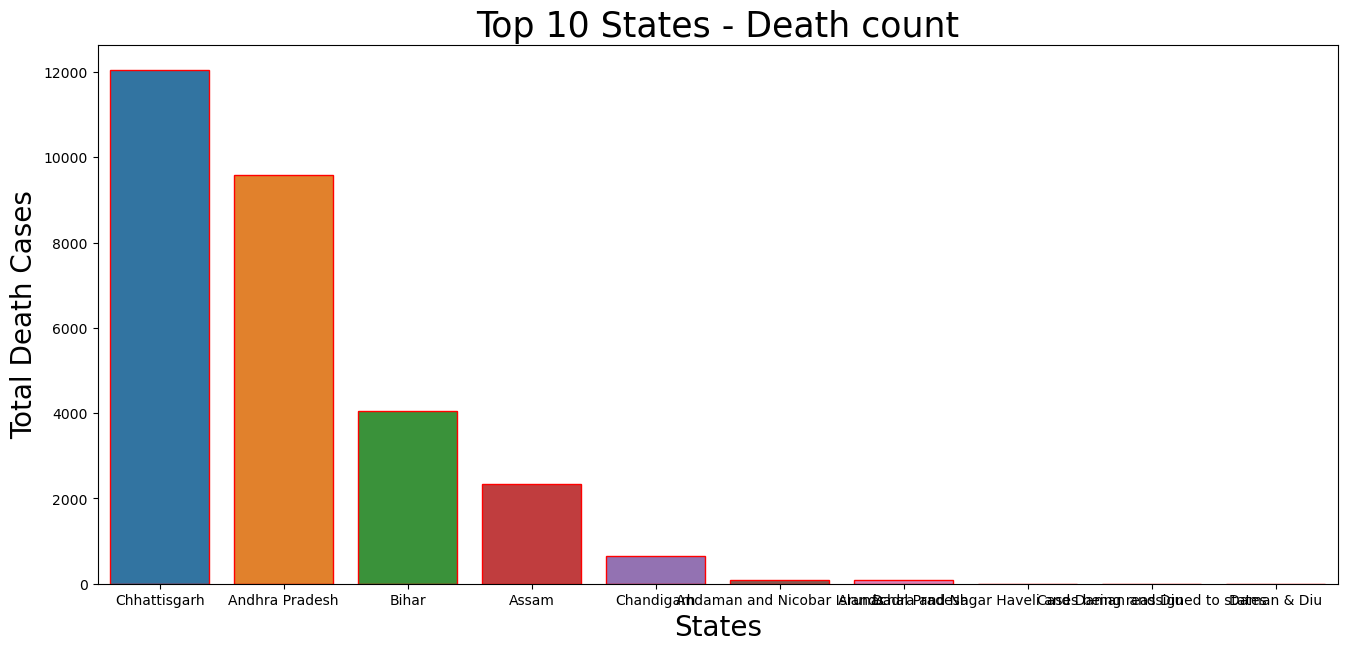

In [300]:
top_10_death_cases=covid_df.groupby(by='State/UnionTerritory').max()[['Deaths','Date']][:10].sort_values(by='Deaths',ascending=False).reset_index()
fig=plt.figure(figsize=(16,7))
plt.title('Top 10 States - Death count', size=25)
ad=sns.barplot(data= top_10_death_cases,x='State/UnionTerritory',y='Deaths',edgecolor='Red')
plt.xlabel("States", size=20)
plt.ylabel("Total Death Cases", size=20)

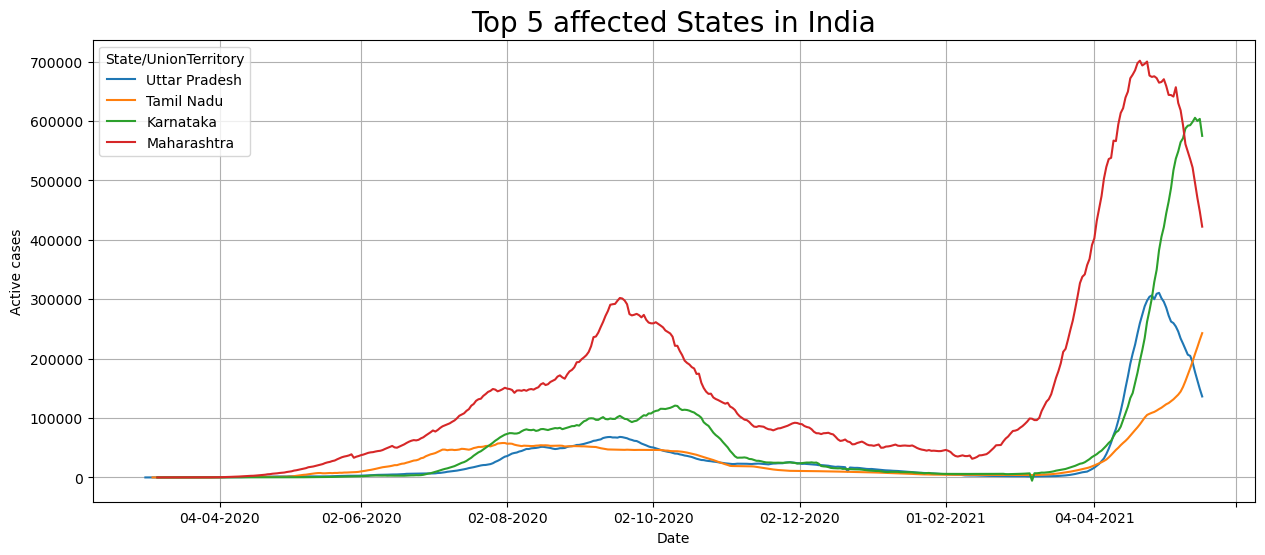

In [285]:
# growth Trend
import matplotlib.dates as mdates

fig=plt.figure(figsize=(15,6))
gt=sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra','Karnataka','kerala','Tamil Nadu','Uttar Pradesh'])], x='Date' , y='Active cases', hue ='State/UnionTerritory')

# Format the date axis for better readability
# Adding a Two month interval to plot the x axis date interval
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

gt.set_title("Top 5 affected States in India",size=20)
plt.grid(True)

##### Through the graph we can observe that after the March month of 2021 and July month of 2020 The Active Cases count started growing significantly.

#### The Count of active cases in the country Peaked in the month of April and May of 2021.

In [286]:
vaccine_df.head(5)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [287]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [288]:
vaccine_df.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [289]:
# cleaning the column headers and values

vaccine_df.rename(columns={'Updated On': 'Vaccinated date'})


# remover rows where state = India
vaccine_df=vaccine_df[vaccine_df['State']!='India']
vaccination=vaccine_df.drop(columns={'Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'},axis=1)


In [290]:
#Most vaccinated state
vaccination.rename(columns={'Total Individuals Vaccinated':'Total'},inplace =True)
vaccination.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [291]:
max_vac=vaccination.groupby('State')['Total'].sum().to_frame('Total')
max_vac=max_vac.sort_values('Total', ascending=False)[:5]
max_vac


,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


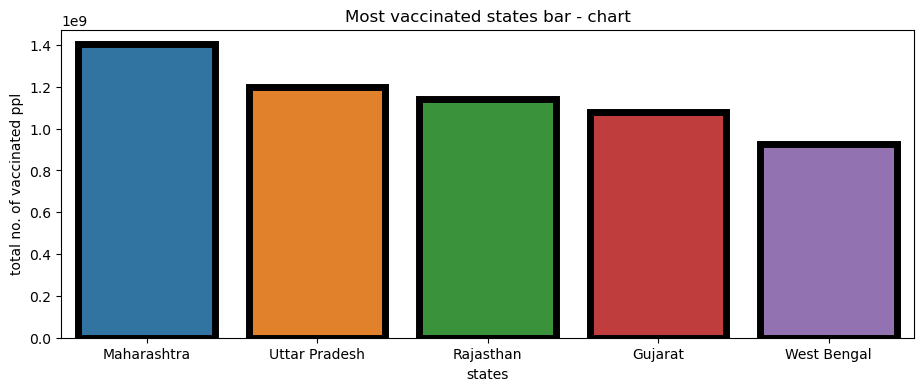

In [292]:
fig=plt.figure(figsize=(11,4))
plt.title('Most vaccinated states bar - chart')
x=sns.barplot(data=max_vac, y=max_vac.Total,x=max_vac.index, linewidth=5, edgecolor='black')
plt.xlabel('states')
plt.ylabel('total no. of vaccinated ppl')
plt.show()

In [293]:
#Least Vaccinated States
min_vac=vaccination.groupby('State')['Total'].sum().to_frame('Total')
min_vac=min_vac.sort_values('Total',ascending=True)[:5]
min_vac

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


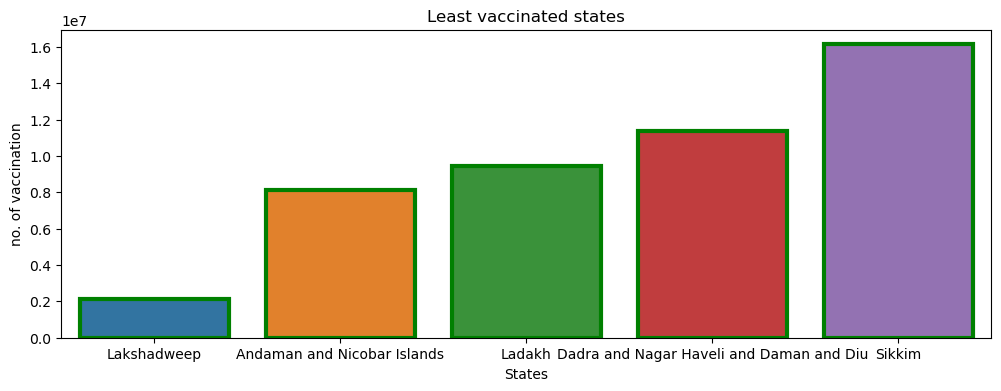

In [294]:
fig=plt.figure(figsize=(12,4))
plt.title('Least vaccinated states')
sns.barplot(data=min_vac,x=min_vac.index,y=min_vac['Total'],linewidth=3, edgecolor='green')
plt.xlabel('States')
plt.ylabel('no. of vaccination')
plt.show()